In [2]:
from google.colab import files

# Upload the .tar file
uploaded = files.upload()

Saving rotten_tomatoes_movies.csv to rotten_tomatoes_movies.csv


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import plotly.express as px

# df_critic = pd.read_csv('rotten_tomatoes_critic_reviews_50k.csv')
df_movie = pd.read_csv('rotten_tomatoes_movies.csv')

In [ ]:
df_movie.head()

In [6]:
df_movie.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [ ]:
df_movie['genres'] = df_movie['genres'].astype('category')
df_movie.info()

In [8]:
df_movie.isna().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

In [9]:
df_movie.dropna(inplace = True)

In [10]:
df_movie.isna().sum()

rotten_tomatoes_link                0
movie_title                         0
movie_info                          0
critics_consensus                   0
content_rating                      0
genres                              0
directors                           0
authors                             0
actors                              0
original_release_date               0
streaming_release_date              0
runtime                             0
production_company                  0
tomatometer_status                  0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                     0
audience_rating                     0
audience_count                      0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
dtype: int64

# Graphical Distribution

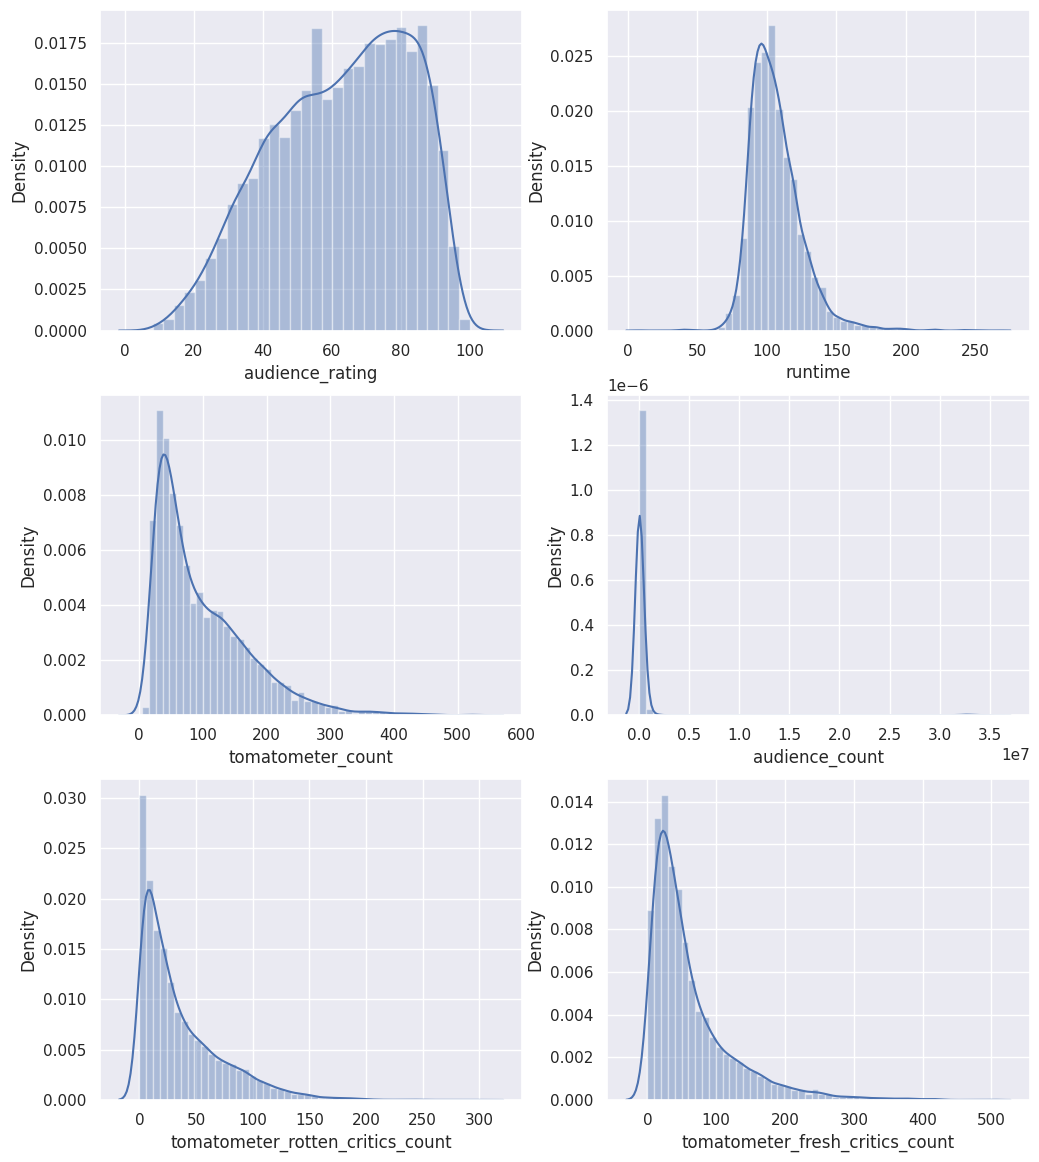

In [11]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.distplot(df_movie['audience_rating'],kde=True,ax=axis[0,0])
sns.distplot(df_movie['runtime'], kde=True, ax=axis[0,1])
sns.distplot(df_movie['tomatometer_count'], kde=True, ax=axis[1,0])
sns.distplot(df_movie['audience_count'], kde=True, ax=axis[1,1])
sns.distplot(df_movie['tomatometer_fresh_critics_count'], kde=True, ax=axis[2,1])
sns.distplot(df_movie['tomatometer_rotten_critics_count'], kde=True, ax=axis[2,0])
# sns.distplot(df_movie['tomatometer_top_critics_count'], kde=True, ax=axis[2,0])
plt.show()

In [12]:
df_movie.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,8077.000000,8077.000000,8077.000000,8077.000000,8.077000e+03,8077.000000,8077.000000,8077.000000
mean,106.286740,61.316207,98.986629,62.730593,2.978684e+05,25.000990,62.457719,36.556395
std,18.680819,27.690035,73.865297,19.667071,2.554684e+06,15.257895,62.000083,36.477441
min,8.000000,0.000000,5.000000,8.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,94.000000,39.000000,42.000000,48.000000,5.416000e+03,12.000000,21.000000,9.000000
50%,103.000000,67.000000,75.000000,65.000000,2.218800e+04,23.000000,42.000000,24.000000
75%,116.000000,86.000000,138.000000,79.000000,8.593600e+04,37.000000,82.000000,53.000000
max,266.000000,100.000000,535.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


# Observations

- `Rotten` and `Fresh` critics have a very similar distribution.
- `Audience` tends to be "nicer" than critics when rating a movie.
- Majority of the movies are clocking in with a runtime on average of `106` min,
being 75% of the movies being =< `116` min.

# Graphical Analysis

Text(0.5, 1.0, 'Content Rating Distribution')

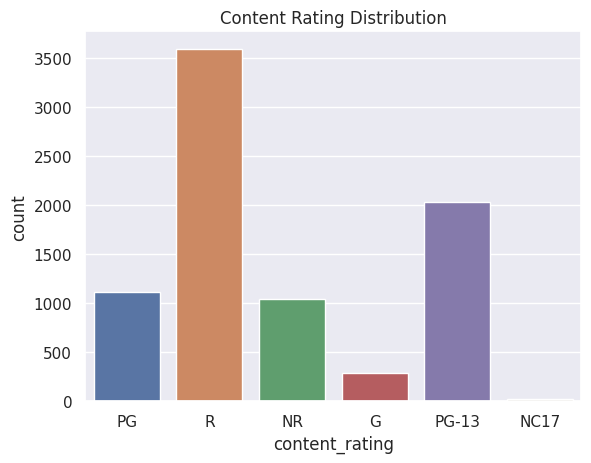

In [13]:
sns.countplot(data = df_movie,x = 'content_rating')
plt.title('Content Rating Distribution')

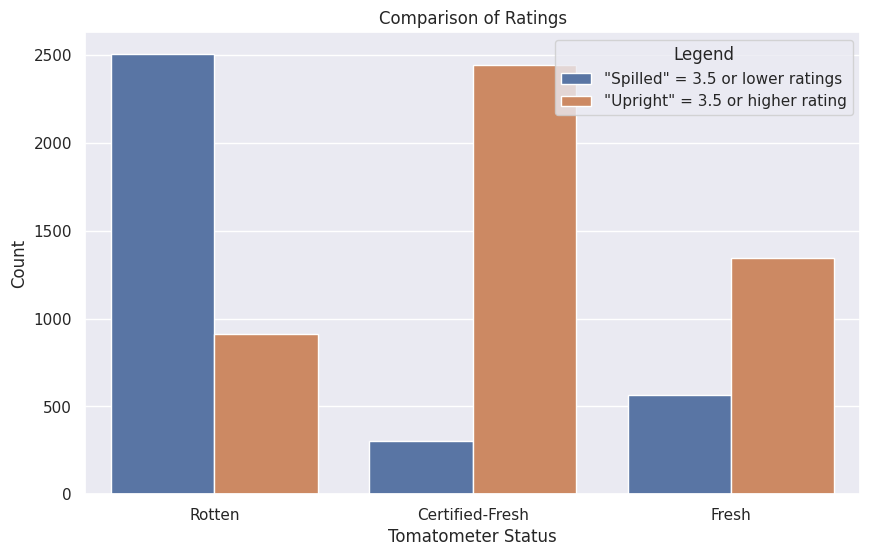

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_movie, x='tomatometer_status', hue='audience_status')
plt.title('Comparison of Ratings')
plt.xlabel('Tomatometer Status')
plt.ylabel('Count')
ax.legend(title='Legend', labels=['"Spilled" = 3.5 or lower ratings', '"Upright" = 3.5 or higher rating'], loc='upper right')
plt.show()



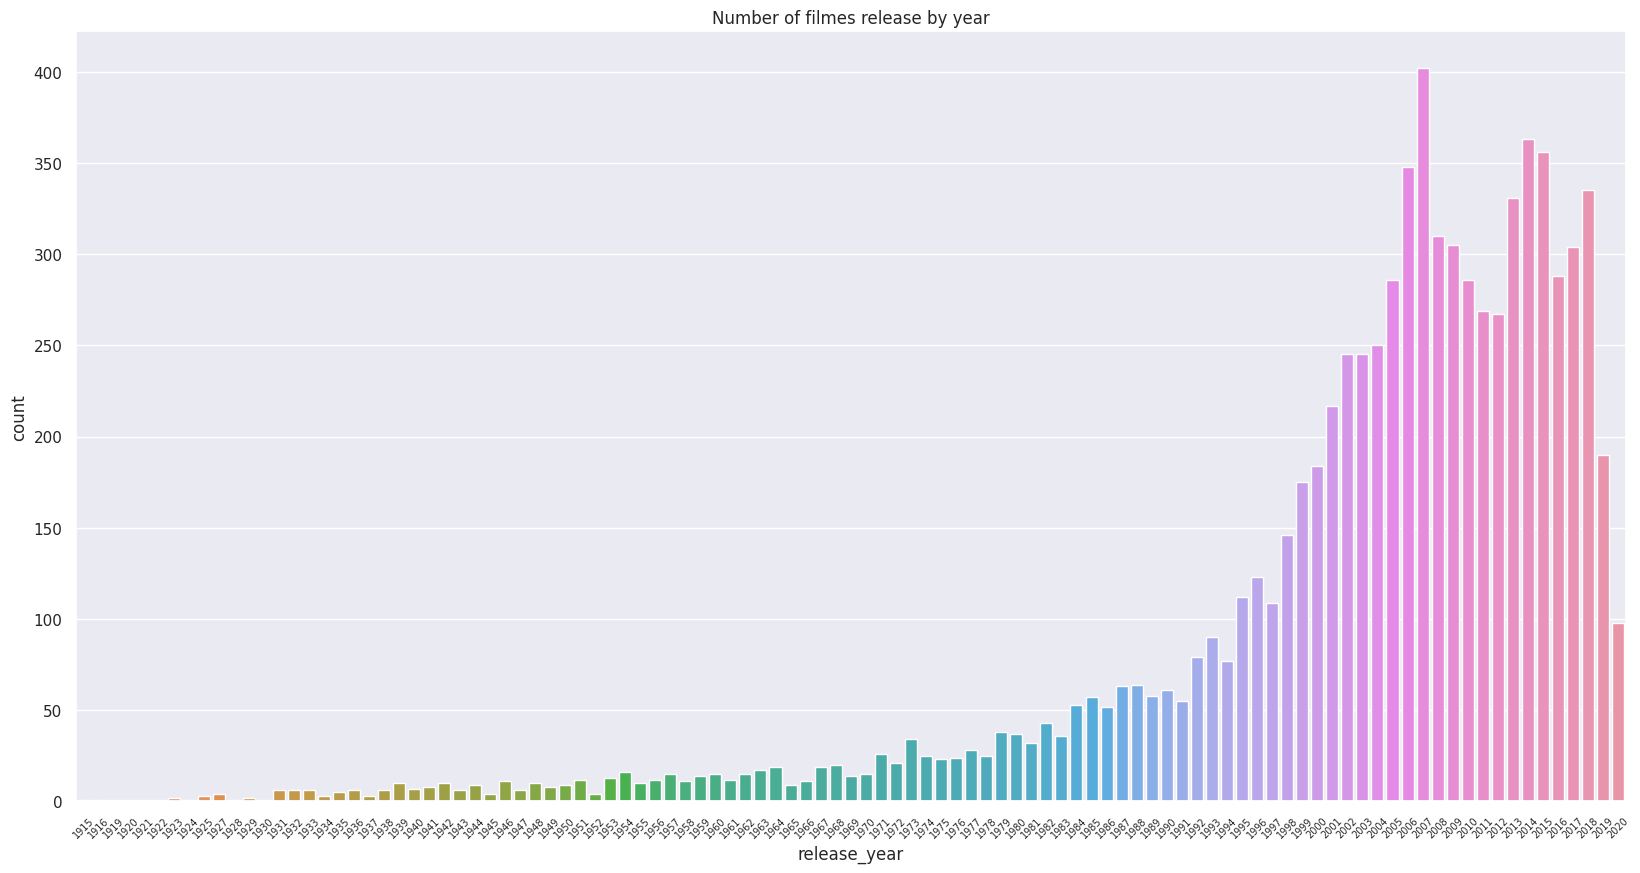

In [15]:
df_movie['original_release_date'] = pd.to_datetime(df_movie['original_release_date'])
df_movie['release_year'] = df_movie['original_release_date'].dt.year

plt.figure(figsize = (20,10))
sns.countplot(data = df_movie, x = 'release_year')
plt.title('Number of filmes release by year')
plt.xticks(rotation=45,fontsize = 7)


plt.show()

# Observations
- A great amount of movies have been rated either `R` or `PG-13`.
- By the 2000s there was a big increase on the amount of movies made.
- By `2008-2012`, possibly, due to the economic crisis there was a huge decrease in movies productions. Same in `2020` thanks to COVID-19

# Correlation Analysis

In [16]:
df_movie.cov()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,release_year
runtime,3.489730e+02,8.091762e+01,3.467933e+02,9.832033e+01,3.280985e+06,5.805519e+01,3.037083e+02,4.315272e+01,-19.958081
tomatometer_rating,8.091762e+01,7.667380e+02,1.749673e+02,3.864204e+02,1.370713e+06,9.227151e+00,8.060896e+02,-6.309922e+02,-100.761240
tomatometer_count,3.467933e+02,1.749673e+02,5.456082e+03,1.322002e+02,2.040021e+07,1.017033e+03,3.985257e+03,1.473227e+03,444.217416
audience_rating,9.832033e+01,3.864204e+02,1.322002e+02,3.867937e+02,1.123770e+06,1.314155e+01,4.344986e+02,-3.022981e+02,-94.588376
audience_count,3.280985e+06,1.370713e+06,2.040021e+07,1.123770e+06,6.526412e+12,4.020872e+06,1.606521e+07,4.328228e+06,-384824.446140
tomatometer_top_critics_count,5.805519e+01,9.227151e+00,1.017033e+03,1.314155e+01,4.020872e+06,2.328034e+02,7.031408e+02,3.142810e+02,110.669319
tomatometer_fresh_critics_count,3.037083e+02,8.060896e+02,3.985257e+03,4.344986e+02,1.606521e+07,7.031408e+02,3.844010e+03,1.431513e+02,251.656958
tomatometer_rotten_critics_count,4.315272e+01,-6.309922e+02,1.473227e+03,-3.022981e+02,4.328228e+06,3.142810e+02,1.431513e+02,1.330604e+03,192.780228
release_year,-1.995808e+01,-1.007612e+02,4.442174e+02,-9.458838e+01,-3.848244e+05,1.106693e+02,2.516570e+02,1.927802e+02,251.593179


In [17]:
df_movie.corr()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,release_year
runtime,1.000000,0.156431,0.251324,0.267613,0.068750,0.203681,0.262222,0.063327,-0.067356
tomatometer_rating,0.156431,1.000000,0.085545,0.709573,0.019377,0.021840,0.469535,-0.624707,-0.229414
tomatometer_count,0.251324,0.085545,1.000000,0.091002,0.108108,0.902402,0.870209,0.546770,0.379145
audience_rating,0.267613,0.709573,0.091002,1.000000,0.022367,0.043794,0.356333,-0.421377,-0.303214
audience_count,0.068750,0.019377,0.108108,0.022367,1.000000,0.103155,0.101428,0.046446,-0.009497
tomatometer_top_critics_count,0.203681,0.021840,0.902402,0.043794,0.103155,1.000000,0.743285,0.564676,0.457281
tomatometer_fresh_critics_count,0.262222,0.469535,0.870209,0.356333,0.101428,0.743285,1.000000,0.063296,0.255898
tomatometer_rotten_critics_count,0.063327,-0.624707,0.546770,-0.421377,0.046446,0.564676,0.063296,1.000000,0.333187
release_year,-0.067356,-0.229414,0.379145,-0.303214,-0.009497,0.457281,0.255898,0.333187,1.000000


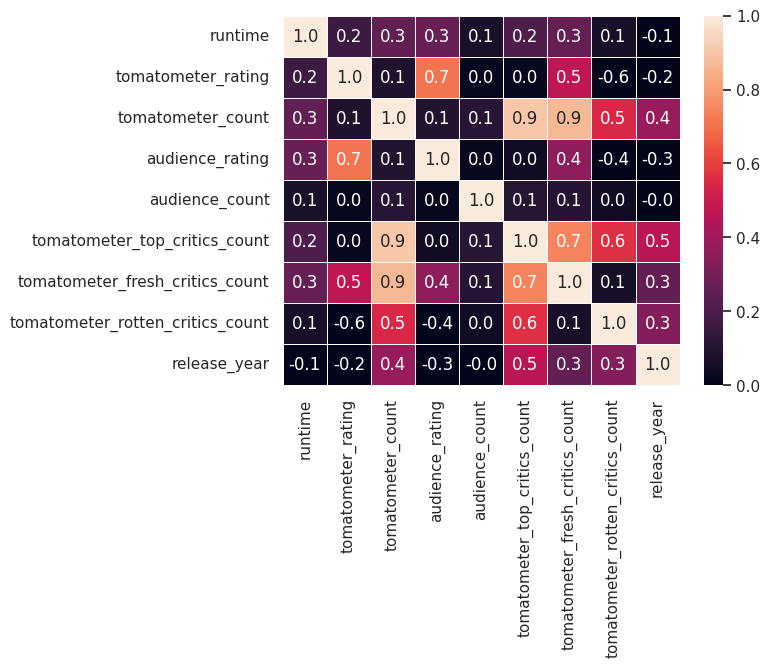

In [18]:
sns.heatmap(df_movie.corr(),annot = True,linewidths = 0.5,vmin=0, vmax=1,fmt=".1f")
plt.show()

# Observations
- There is not really anything that stands out. One thing that seems interesting
is how the myth of long movies do not go well with audiences.
- One not surprising aspect, is that `Release Year & Top Critics Count` are somewhat related. Thanks to the grow of the industry, more journalists shifted their carrer as critics.
- Interesting to point out that `Release Year & Runtime` are not at all correlated.

# Directors and Actors

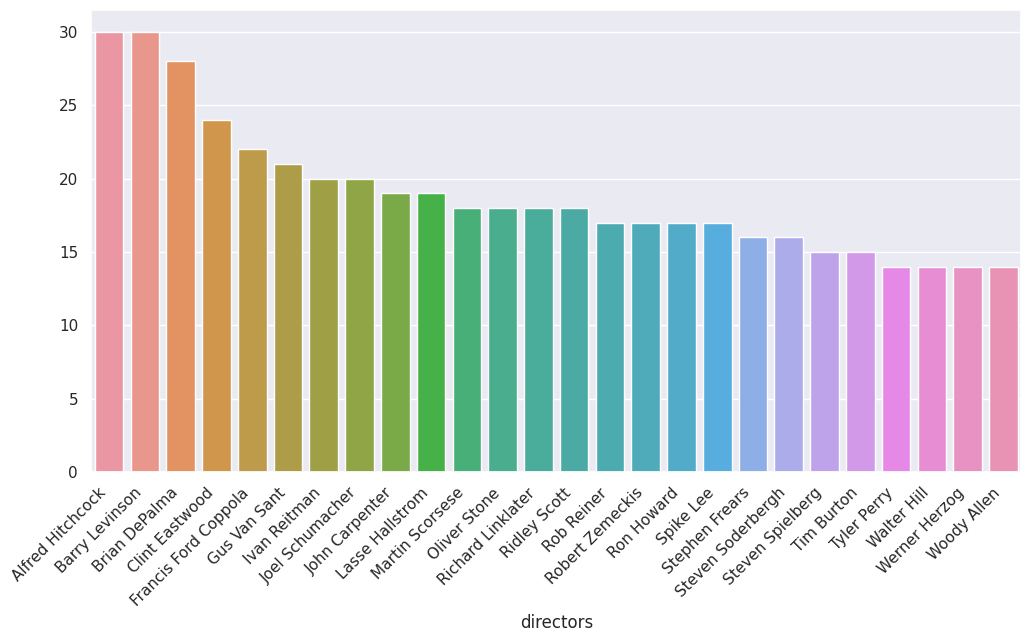

In [19]:
director_counts = df_movie.groupby('directors').size()
directors_with_more_than_13_counts = director_counts[director_counts > 13]
directors_sorted = directors_with_more_than_13_counts.sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x = directors_with_more_than_13_counts.index, y=directors_sorted.values)
plt.xticks(rotation = 45, ha='right')
plt.show()

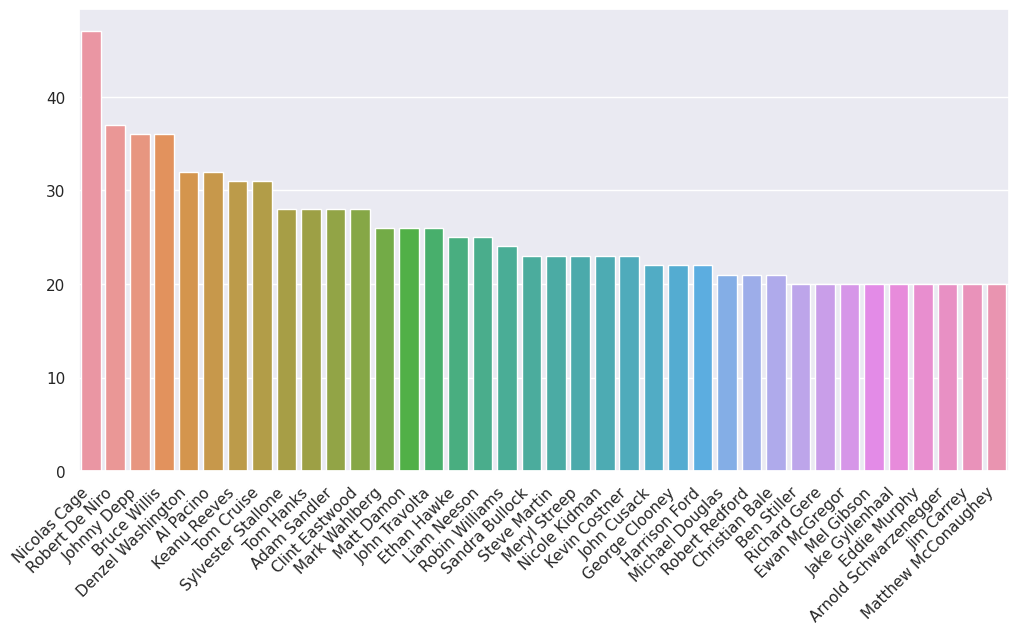

In [20]:
actor_counts = df_movie['actors'].str.split(',').str[0].value_counts()
actors_ = actor_counts[actor_counts >= 20]
actors_

plt.figure(figsize=(12,6))
sns.barplot(x = actors_.index, y=actors_.values)
plt.xticks(rotation = 45, ha='right')
plt.show()

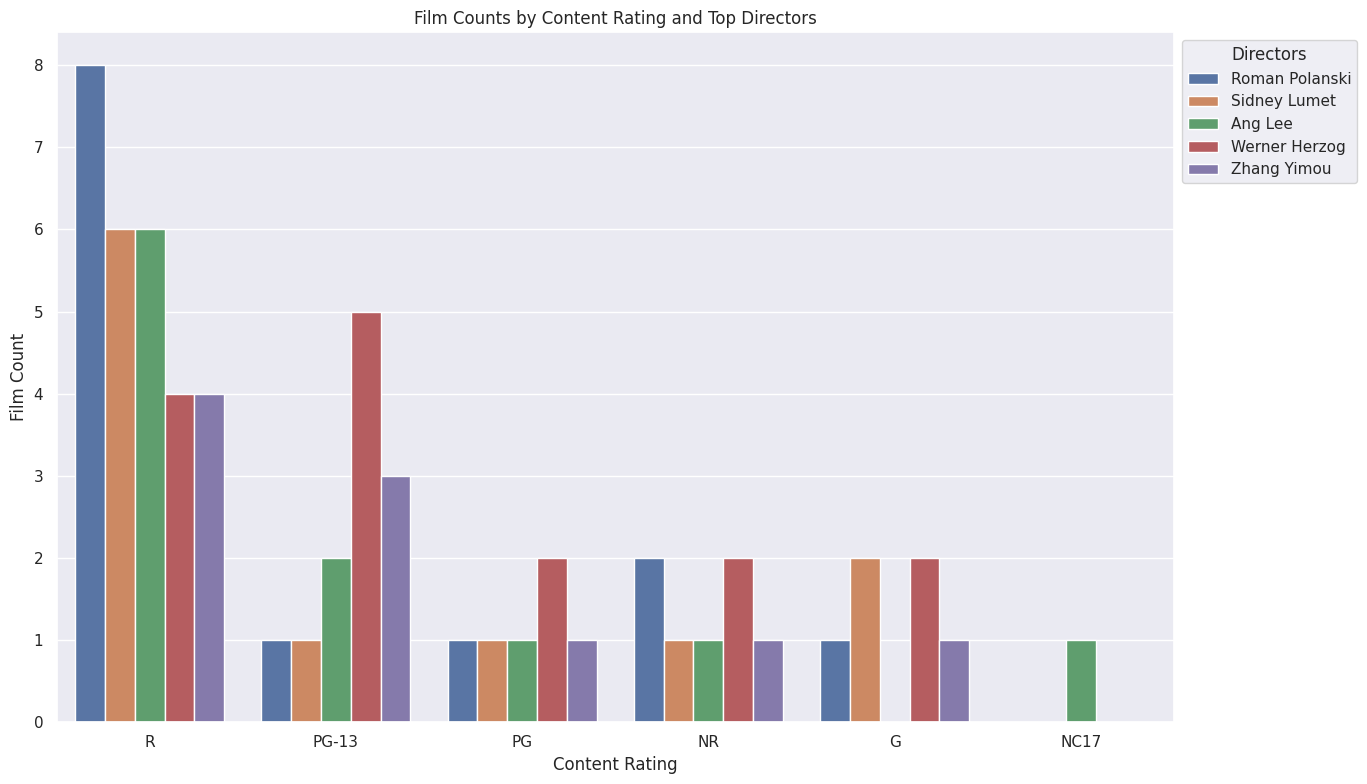

In [21]:
# Assuming df_grouped is your grouped DataFrame
df_grouped = df_movie.groupby(['content_rating', 'directors']).size().sort_values(ascending=False).reset_index()

# Filter the top N directors with the highest counts
top_directors = df_grouped['directors'].value_counts().nlargest(5).index
df_top_directors = df_grouped[df_grouped['directors'].isin(top_directors)]

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=df_top_directors, x='content_rating', y=0, hue='directors')
plt.title('Film Counts by Content Rating and Top Directors')
plt.xlabel('Content Rating')
plt.ylabel('Film Count')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Directors', bbox_to_anchor=(1, 1))
plt.show()

# Observations

- Among directors, there is not a **single female director** that comes close to the top 10.
- Among actors, there is only 3 women that break in with actors/actress that have made more than 20 movies. They are: `Sanda Bullock`,`Meryl Streep` and `Nicole Kidman`.
- `Clint Eastwood` is one of the kind, the actor/director has been a part of 28 features film as an actor, and 50 films directed.

# Runtime x Rating

In [22]:
df2 = df_movie.copy()

In [23]:
bins = [20,40,80,100,160,float('inf')]
labels = ['Short','Medium Short','Medium Long','Long','Very Long']
df2['group_runtime'] = pd.cut(df_movie['runtime'],bins)
df2['category_runtime'] = pd.cut(df_movie['runtime'],bins,labels = labels)

df2.tail(3)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,release_year,group_runtime,category_runtime
17706,m/zoom_2006,Zoom,"Capt. Zoom, or Jack (Tim Allen), as he is now ...",Lacking the punch and good cheer of The Incred...,PG,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,"Adam Rifkin, David Berenbaum","Tim Allen, Courteney Cox, Chevy Chase, Spencer...",2006-08-11,...,68.0,Spilled,33.0,11369.0,19,3,65,2006,"(80.0, 100.0]",Medium Long
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,291.0,Upright,92.0,101511.0,50,285,7,2016,"(100.0, 160.0]",Long
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,23.0,Upright,91.0,30193.0,6,22,1,1964,"(100.0, 160.0]",Long


In [24]:
prop_run = pd.crosstab(index = df2['content_rating'],columns = [df2['category_runtime']],margins = True,margins_name = 'Total')
prop_run

category_runtime,Short,Medium Short,Medium Long,Long,Very Long,Total
content_rating,,,,,,
G,6,50,121,95,11,283
NC17,0,0,9,13,1,23
NR,0,76,466,475,19,1036
PG,0,33,519,545,18,1115
PG-13,0,20,742,1238,30,2030
R,0,42,1417,2089,41,3589
Total,6,221,3274,4455,120,8076


In [25]:
prop_R = round((prop_run['Long']['Total']/prop_run['Total']['Total']),4)*100
prop_R

55.16

In [29]:
prop_R = round((prop_run['Long']['R']/prop_run['Total']['Total']),2)*100
prop_R

26.0

In [31]:
prop_R = round((prop_run['Total']['R']/prop_run['Total']['Total']),4)*100
prop_R

44.440000000000005

In [28]:
prop_P= round((prop_run['Medium Long']['Total']/prop_run['Total']['Total']),4)*100
prop_P

40.54

# Observations

- There is `55.16%` probability of a movie being **Long**. While there is a `44.54%` probability of a movie being **Medium-Long**.
- There is a `26%` chance of a movie being **Long** and have a content rating of **R**.
- The lilekyhood for a movie to be rated **R** is `40,54%`.

# Studios and Genres

In [ ]:
df_movie.head()

In [ ]:
genres_counts = df_movie['genres'].str.split(',').str[0].value_counts()
genres_counts

Text(0.5, 1.0, 'Distribution of Movies per Genres')

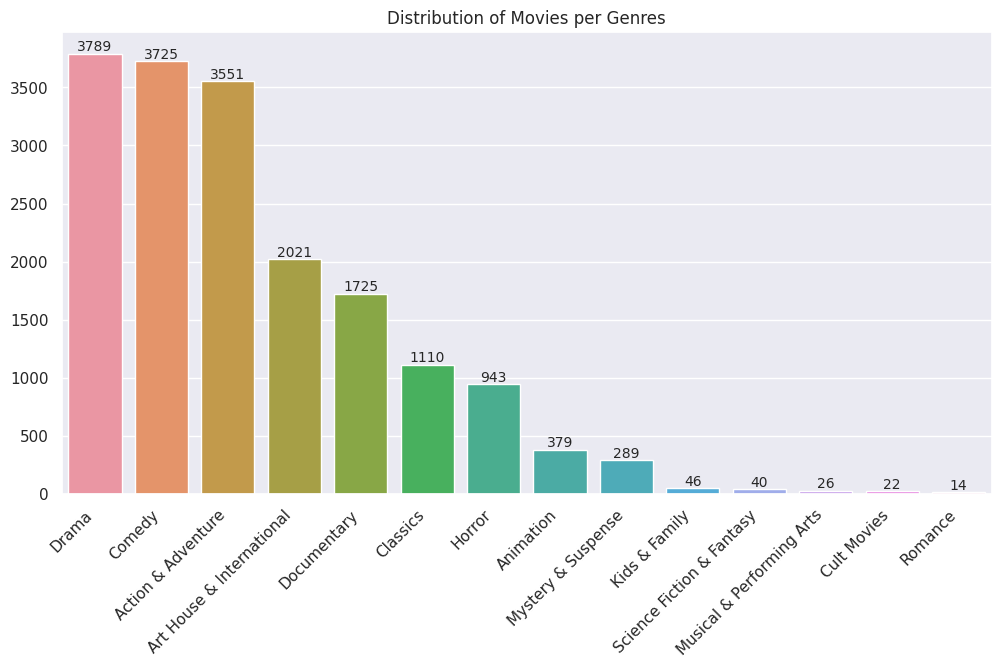

In [73]:
genres_counts = df_movie['genres'].str.split(',').str[0].value_counts()
genres_counts = genres_counts[genres_counts > 9]

plt.figure(figsize = (12,6))
sns.barplot(x = genres_counts.index, y = genres_counts.values)
plt.xticks(rotation = 45,ha='right')

for index, value in enumerate(genres_counts.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Movies per Genres')

In [80]:
x = df_movie.groupby('production_company').size().sort_values(ascending = False)[0:5]
x

production_company
Paramount Pictures       517
Warner Bros. Pictures    509
Universal Pictures       495
20th Century Fox         423
IFC Films                413
dtype: int64

# Observations

- The 3 most popular genres by a good margin are `Drama`, `Comedy`, and `Action & Adventure`. Respectively with a film count of 3789, 3725 and 3551.
- The studios that have produced the most amount of films are `Paramount Pictures`, `Warner Bros. Pictures`, `Universal Pictures`, `20th Century Fox`, and `IFC Films`

# Netflix Risig

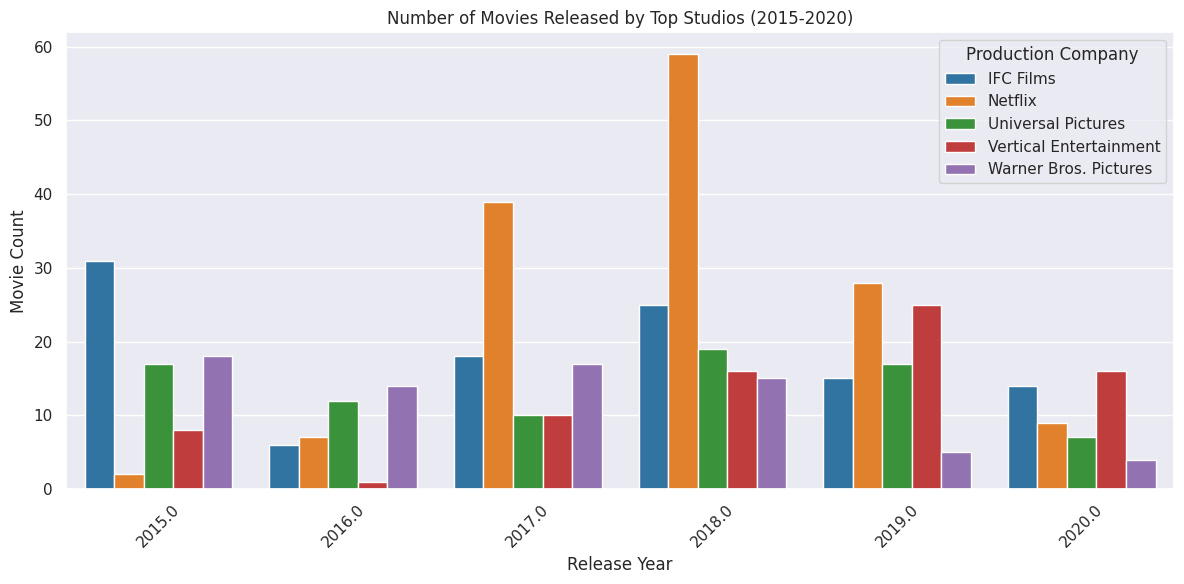

In [68]:
df_movie['original_release_date'] = pd.to_datetime(df_movie['original_release_date'])
df_movie['release_year'] = df_movie['original_release_date'].dt.year
# df_movie['release_year'] = pd.to_datetime(df_movie['release_year'], format='%Y')

studios_yr = df_movie.groupby(['release_year','production_company']).size()

studios_yr = studios_yr.reset_index(name = 'movie_count')

filtr_studios = studios_yr[(studios_yr['release_year']>= 2015) & (studios_yr['release_year'] <= 2020)]
top_studios = filtr_studios.groupby('production_company')['movie_count'].sum().sort_values(ascending=False).index[:5]

final_results = filtr_studios[filtr_studios['production_company'].isin(top_studios)]

paleti = sns.color_palette("tab10")

plt.figure(figsize=(12, 6))
sns.barplot(data=final_results, x='release_year', y='movie_count', hue='production_company', palette=paleti)
plt.title('Number of Movies Released by Top Studios (2015-2020)')
plt.xlabel('Release Year')
plt.ylabel('Movie Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Production Company')
plt.show()

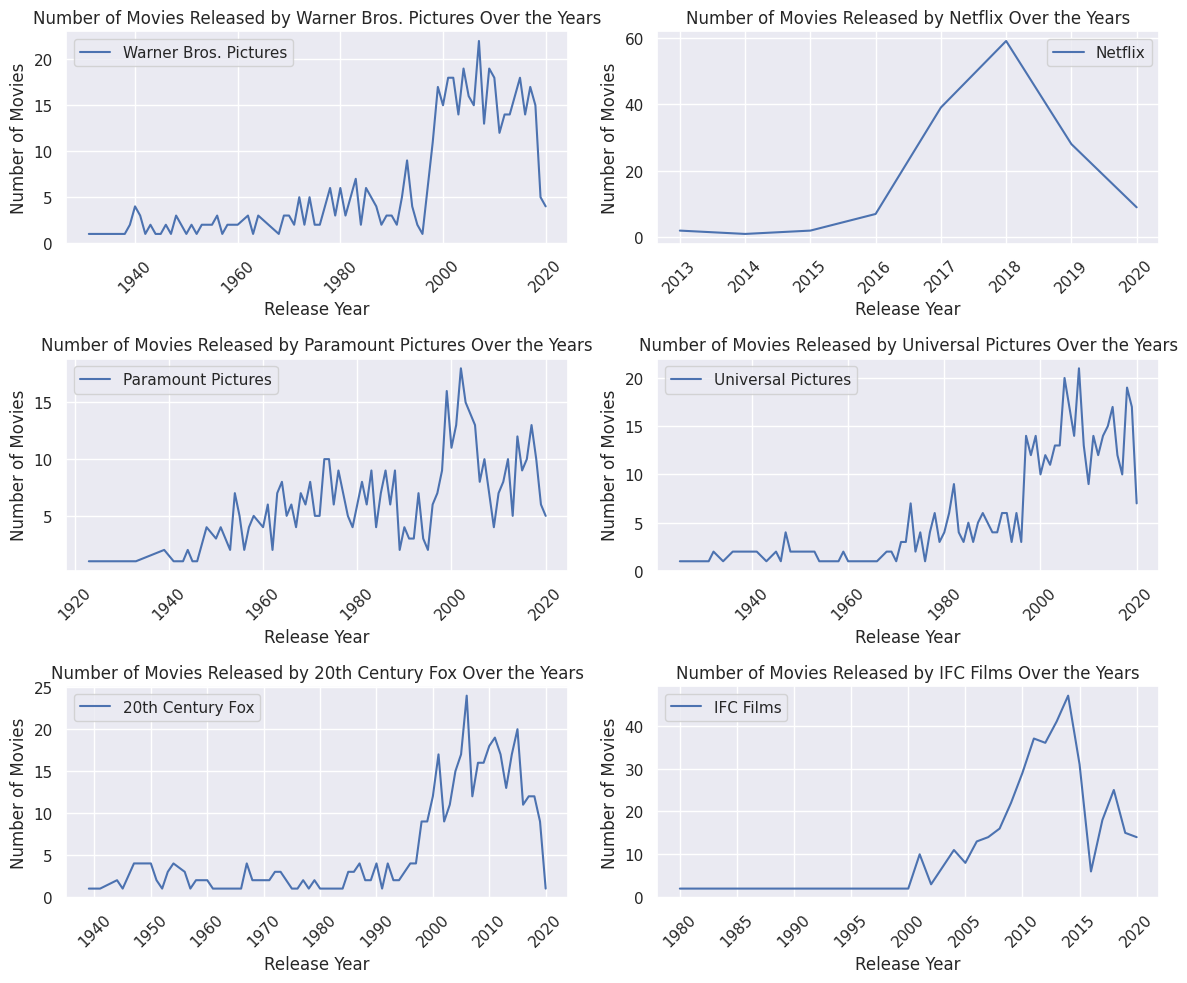

In [93]:
production_companies = ['Warner Bros. Pictures', 'Netflix', 'Paramount Pictures', 'Universal Pictures', '20th Century Fox', 'IFC Films']

# Create a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

# Iterate through production companies and plot line plots
for company, ax in zip(production_companies, axes.flatten()):
    n = df_movie[df_movie['production_company'] == company]
    time = n.groupby('release_year').size()
    sns.lineplot(data=time, x=time.index, y=time.values, ax=ax)
    ax.set_title(f'Number of Movies Released by {company} Over the Years')
    ax.set_xlabel('Release Year')
    ax.set_ylabel('Number of Movies')
    ax.tick_params(axis='x', rotation=45)
    ax.legend([company])

plt.tight_layout()
plt.show()


# Observations
- `Netflix` had a tremendous grow starting in 2016. It basically reached a production level of 3 times of what the other majos studios were producing.
- `Netflix` reached its peak (production terms) by `2018` with an outstanding 60 productions made.

# Conclusion

- For the majority of time, the film industry has been growing.
- Unfornately, our data only goes to `2020`. But it would be interesting to see how the industry have been since the pandemic.
- Best bet would be that major studios are still beating on favorites genres, such as `Drama`, `Action` and `Comedy`.